<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предообработка" data-toc-modified-id="Предообработка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предообработка</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Расчет-эффективности-обогащения" data-toc-modified-id="Расчет-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Расчет эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span><ul class="toc-item"><li><span><a href="#Удаление-аномальных-значений" data-toc-modified-id="Удаление-аномальных-значений-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Удаление аномальных значений</a></span></li></ul></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выбор модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-модели" data-toc-modified-id="Подготовка-данных-для-модели-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Подготовка данных для модели</a></span></li><li><span><a href="#Модель-для-признака-чернового-концентрата" data-toc-modified-id="Модель-для-признака-чернового-концентрата-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель для признака чернового концентрата</a></span></li><li><span><a href="#Модель-для-признака-финального-концентрата" data-toc-modified-id="Модель-для-признака-финального-концентрата-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель для признака финального концентрата</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Кросс-валидация-на-тестовой-выборке" data-toc-modified-id="Кросс-валидация-на-тестовой-выборке-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Кросс-валидация на тестовой выборке</a></span></li><li><span><a href="#Тестирование-модели-на-всей-тестовой-выборке" data-toc-modified-id="Тестирование-модели-на-всей-тестовой-выборке-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Тестирование модели на всей тестовой выборке</a></span></li></ul></li></ul></li></ul></div>

# Разработка модели, предсказывающей коэффициент восстановления золота из золотосодержащей руды, для металлообрабатывающего предприятия

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

### Предообработка

**Обучающая выборка**

Прочитаем данные из обучающей выборки и сохраним их в переменную train

In [2]:
train = pd.read_csv('gold_recovery_train_new.csv')

Выведем первые три строки таблицы

In [3]:
train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


Получим общую информацию о данных

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Таблица содержит записи с параметрами, полученными в ходе восстановления золота из руды. Есть пропуски. Т.к. по условиям задачи соседние по времени параметры часто похожи, то заполним их с помощью метода fillna, указав параметр заполнения "ffill"

In [5]:
train = train.fillna(method='ffill') 

Признак с датой и временем (date), по которому индексируются данные, переведем в формат datetime

In [6]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%dT%H:%M:%S')

Установим дату в качестве индекса

In [7]:
train.set_index('date', inplace=True)

Посмотрим, что получилось

In [8]:
train.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                     

Посмотрим на данные методом describe()

In [10]:
train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,...,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,5.141921,10.132848,9.109311,44.003792,66.518832,9.607035,2.583179,10.510889,2.918421,133.213938,...,19.979788,-478.702912,15.486812,-460.237231,16.774657,-483.957839,13.064236,-483.967726,19.576675,-506.805007
std,1.369603,1.654925,2.886929,4.905261,10.295402,2.319069,0.983118,3.003888,0.903712,39.604988,...,5.663611,50.739376,5.255555,58.848850,5.831978,37.892065,5.765567,39.206771,5.764496,37.086065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211500,9.296833,7.422466,43.276111,62.545817,7.997429,1.889827,8.810653,2.368607,106.859801,...,14.990463,-500.628716,11.894590,-500.149141,11.083699,-500.363203,8.994384,-500.105994,14.989244,-500.745309
50%,4.994607,10.297013,8.801909,44.872436,67.432775,9.480270,2.581476,10.514141,2.851025,132.999290,...,20.001601,-499.681587,14.975474,-499.388853,17.931987,-499.702479,11.997537,-499.914556,19.984165,-500.061488
75%,5.859495,11.170578,10.452148,46.166425,72.346428,11.003707,3.237211,11.932186,3.434764,159.825396,...,24.990768,-477.486391,20.059286,-400.039047,21.346135,-487.864322,17.982826,-453.274822,24.991615,-499.536481
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Есть нули и отрицательные значения, но не будем избавляться от них, т.к. это реальные параметры, полученные в ходе флотации и очистки золота, они потребуются в расчетах. Можем предположить, что в некоторых записях данные значения также связаны с очень низким содержанием чистого золота в руде 

Данные в нужном формате, пропусков нет. Аналогично посмотрим на тестовую выборку и исходные данные и проведем для них предообработку

**Тестовая выборка**

In [11]:
test = pd.read_csv('gold_recovery_test_new.csv')

In [12]:
test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Заподняем пропуски предыдущими значениями 

In [14]:
test = test.fillna(method='ffill') 

Преобразовываем дату и время в формат datetime

In [15]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%dT%H:%M:%S')

Установим дату в качестве индекса

In [16]:
test.set_index('date', inplace=True)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

In [18]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5290.000000,5290.000000,5290.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.842478,8.684695,7.266339,1.383430,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.023252,3.073753,0.610219,0.643548,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489556,6.890000,0.907390,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052131,7.250000,1.197586,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.028043,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


Пропуски заполнили, дату преобразовали. Аналогично обучающей выборке - нули и отрицательные значения не трогаем 

**Исходные данные**

In [19]:
full = pd.read_csv('gold_recovery_full_new.csv')

In [20]:
full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [21]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Заполняем пропуски предыдущими значениями

In [22]:
full = full.fillna(method='ffill') 

Преобразовываем дату и время в формат datetime

In [23]:
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%dT%H:%M:%S')

Устанавливаем дату в качестве индекса

In [24]:
full.set_index('date', inplace=True)

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb                         19439 non-null  float64
 2   final.output.concentrate_sol                        19439 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19439 non-null  float64
 6   final.output.tail_pb                                19439 non-null  float64
 7   final.output.tail_sol                               19439 non-null  float64
 8   final.output.tail_au                     

Аналогично педыдущим выборкам видим нули и отрицательные значения в параметрах. 

In [26]:
full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,...,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000,19439.000000
mean,5.168387,9.978821,9.429902,44.076513,67.050208,9.688487,2.694897,10.582894,3.042467,144.542451,...,18.983858,-485.898569,15.010207,-461.084281,15.694160,-488.685145,12.198011,-487.150508,18.958458,-505.441125
std,1.372362,1.669228,2.865629,5.129784,10.125840,2.328624,0.958836,2.868996,0.922808,44.593704,...,5.414887,47.760684,4.890153,67.408385,5.510983,34.532835,5.332969,38.346443,5.550514,37.694079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251000,9.137225,7.662953,43.402215,63.299712,8.062715,2.027553,8.937983,2.461138,114.051097,...,14.975304,-500.705070,11.940211,-500.187767,10.988528,-500.458573,8.971074,-500.129482,14.983005,-500.728189
50%,5.066039,10.102264,9.184826,45.011244,68.172738,9.743106,2.743965,10.622340,2.984909,143.205708,...,18.017317,-499.837795,14.970988,-499.459790,14.999920,-499.802639,11.019389,-499.935338,19.960511,-500.048424
75%,5.895401,11.035644,10.920957,46.275313,72.686642,11.134242,3.329206,12.104122,3.571351,175.035538,...,23.012460,-498.249814,19.034114,-400.118175,18.026184,-498.384191,14.019040,-499.437546,24.002617,-499.495403
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Мы предобработали наши данные, для удобства в дальнейшей работе приведем ниже их описание 

### Описание данных

*Технологический процесс*

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate ** — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

### Расчет эффективности обогащения

На обучающей выборке проверим, что эффективность обогащения золота для чернового концентрата (признак rougher.output.recovery) рассчитана правильно.


Эффективность обогащения рассчитывается по формуле

Recovery = ( C * (F-T)) / (F * (C-T)) ) * 100

где:

- F — доля золота в сырье/концентрате до флотации/очистки (rougher.input.feed_au);
- T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au);
- C — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au).

В обучающей выборки создадим новый столбец, в который запишем расчет эффективности обогащения по данной формуле

In [27]:
train['rougher_recovery'] = (
    (train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - train['rougher.output.tail_au']))/ 
    (train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au'])) 
    * 100)                                                                                                                     

Посмотрим, что получилось. 

rougher_recover - то, что мы посчитали по формуле;

rougher.output.recovery - эффективность обогащения, которая изначально присутствовала в обучающей выборке

In [28]:
train['rougher_recovery'].head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher_recovery, dtype: float64

In [29]:
train['rougher.output.recovery'].head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

Первые 5 значений выглядят одинаковыми. Рассчитаем MAE (среднее абсолютное отклонение) между нашими расчетами и значением признака

In [30]:
mae = mean_absolute_error(train['rougher.output.recovery'], train['rougher_recovery'])
mae

9.747175934508209e-15

Полученное значение MAE очень маленькое, примерно 9.7 в -15 степени. Исходя из этого можем предположить, что в обучающей выборке верное значение эффективности обогащения чернового концентрата.

### Анализ признаков, недоступных в тестовой выборке

Посмотрим на названия признаков в тестовой выборке

In [31]:
test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Можем сделать вывод, что в тестовой выборке отсутствуют все признаки с типом параметра "output" - т.е. то, что вышло с соответствующего этапа. В т.ч. нет целевых признаков для оценки качества модели - rougher.output.recovery и final.output.recovery (эффективность обогащения чернового и финального концентрата)

Также отсутствуют признаки с параметром, начинающимся на "rougher.calculation...." - т.е. расчетные характеристики чернового концентрата.

Присоединим к тестовой выборке недостающие столбцы из исходных данных

In [32]:
full.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

In [33]:
test = test.join(full[['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',      
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 
       'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au']])

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.input.sulfate                       5290 non-null   float64
 1   primary_cleaner.input.depressant                    5290 non-null   float64
 2   primary_cleaner.input.feed_size                     5290 non-null   float64
 3   primary_cleaner.input.xanthate                      5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level            5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air              5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level            5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air    

Мы добавили недостающие признаки в выборку test и избавились от пропусков. Выборка готова для дальнейшего анализа данных. 

Для проверки модели мы ее потом вновь скорретируем тестовую выборку вместе с обучающей (шаг 3.2.1), т.к. для "чистоты эксперимента" модель должна обучаться и проверяться на данных, которые есть на начало процесса - а это признаки из первоначальной тестовой выборки. 

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

**Au - золото**

Приведем названия необходимых признаков в порядке технологического процесса, по которым можно делать выводы о том, как меняется концентрат золота на каждом этапе. 
Можем заметить, что в данных отстутвует концентрат золота после второго этапа очистки

1. rougher.input.feed_au  - сырье (смесь золотоносной руды)
2. rougher.output.concentrate_au - черновой концентрат золота после флотации
3. primary_cleaner.output.concentrate_au - концентрат золота после первой очистки
4. отсутствует - концентрат золота после второй очистки
5. final.output.concentrate_au - финальный концентрат золота

Сохраним признаки в переменную

In [35]:
columns_au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
           'final.output.concentrate_au']

Посмотрим на медианные значения концентрации для каждого из этапов (кроме этапа второй очистки, по которому отсутствуют данные). Используем медиану вместо среднего значения, т.к. на этапе подготовки данных мы видели нули.

Напишем функцию, это будет удобно при расчете медианы и для других металлов.

In [36]:
def median(columns):
    """Расчет медианы для концентрации металлов на разных этапах очистки"""
    for col in columns:
        median = train[col].median()
        print(col, median)

In [37]:
median(columns_au)

rougher.input.feed_au 7.64913781291615
rougher.output.concentrate_au 19.94731246552908
primary_cleaner.output.concentrate_au 33.22583488845315
final.output.concentrate_au 44.87243586194744


Посмотрим на распределения. Для этого также напишем функцию, которую в дальнейшем применим и для других металлов

In [38]:
def concentrate(columns):
    """Построение графика концентрации металллов на разных этапах очистки"""
    for col in columns:
        train[col].plot(kind = 'kde', label=col, figsize=(16,9), grid = True)
        
        plt.xlabel('Концентрация')
        plt.ylabel('Частота')
        plt.title('Концентрация на разных этапах')
        plt.legend();

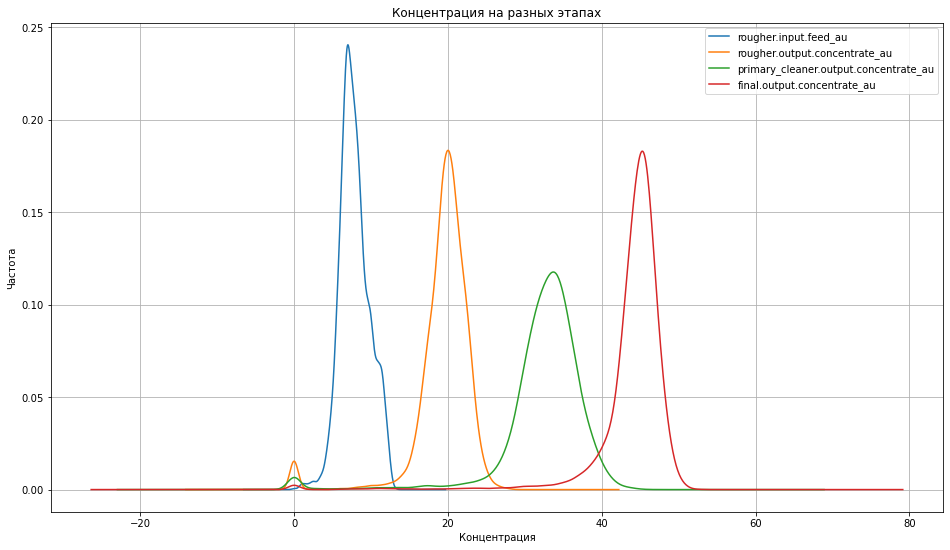

In [39]:
concentrate(columns_au)

Мы видим, что с каждым этапом концентрация золота увеличивается. При этом есть аномальные значения, где среднее 0.

**Ag - серебро**

Названия признаков, необходимые для оценки концентрации серебра на каждом этапе:

1. rougher.input.feed_ag - сырье 

2. rougher.output.concentrate_ag - черновой концентрат серебра после флотации

3. primary_cleaner.output.concentrate_ag - концентрат серебра после первой очистки

4. отсутствует - концентрат серебра после второй очистки

5. final.output.concentrate_ag - финальный концентрат серебра

In [40]:
columns_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
           'final.output.concentrate_ag']

Посмотрим на медиану для концентрации серебра

In [41]:
median(columns_ag)

rougher.input.feed_ag 8.156091639065076
rougher.output.concentrate_ag 11.747361907693833
primary_cleaner.output.concentrate_ag 8.226247496595931
final.output.concentrate_ag 4.994606663584227


Посмотрим на распределение концентрации серебра

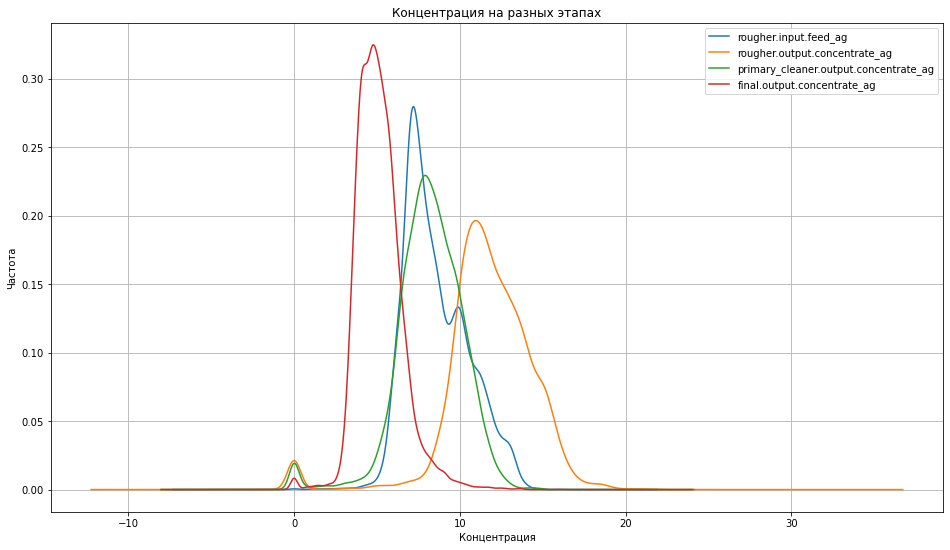

In [42]:
concentrate(columns_ag)

Распределение для серебра выглядит не таким хорошим, как у золота. К финальному этапу концентрация снижается. есть анамальные значения, где среднее 0

**Pb - свинец**

Названия признаков, необходимые для оценки концентрации серебра на каждом этапе:
1. rougher.input.feed_pb - сырье
2. rougher.output.concentrate_pb - черновой концентрат свинца после флотации
3. primary_cleaner.output.concentrate_pb - концентрат свинца после первой очистки
4. отсутствует - концентрат свинца после второй очистки
5. final.output.concentrate_pb - финальный концентрат свинца

Сохраним признаки в переменную

In [43]:
columns_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
           'final.output.concentrate_pb']

Медиана для концентрата свинца на этапах

In [44]:
median(columns_pb)

rougher.input.feed_pb 3.414267466068268
rougher.output.concentrate_pb 7.7604353941811475
primary_cleaner.output.concentrate_pb 9.920598168902927
final.output.concentrate_pb 10.297012728585138


Распределение концентрации свинца

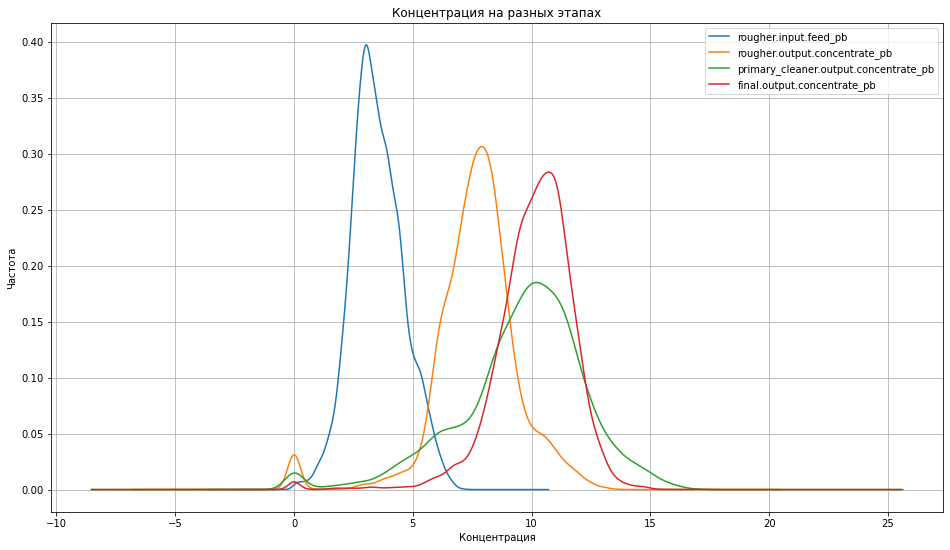

In [45]:
concentrate(columns_pb)

Концентрация свинца увеличивается к этапу первой очистки и на финальном этапе сохраняется примерно с такими же значениями. Увеличивается только число записей, где значения стремятся к среднему. Есть анамальные значения с 0

### Распределения размеров гранул сырья на обучающей и тестовой выборках.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

Сначала посмотрим на медианы

In [46]:
train['rougher.input.feed_size'].median()

55.269783890501536

In [47]:
test['rougher.input.feed_size'].median()

50.8468431600362

Построим распределение

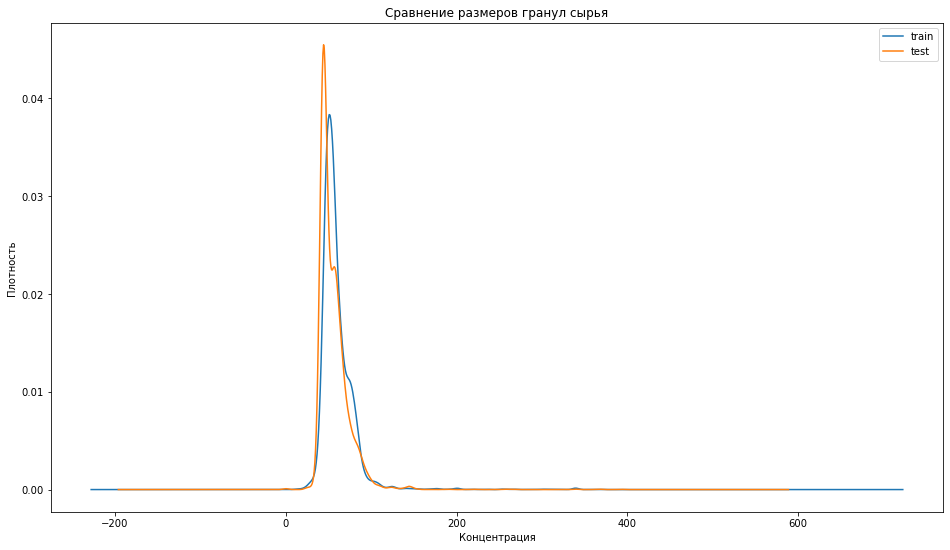

In [48]:
ax = train['rougher.input.feed_size'].plot(kind='kde', figsize = (16,9), label = 'train')
test['rougher.input.feed_size'].plot(kind='kde', ax=ax, label = 'test')
plt.xlabel('Концентрация')
plt.ylabel('Плотность')
plt.title('Сравнение размеров гранул сырья')
plt.legend();

Распределение размера гранул сырья на обучающей и тестовой выборках примерно одинаковое, имеются небольшие различия

### Суммарная концентрация всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Рассчитаем суммарную концентрацию Au, Ag, Pb и sol на стадии сырья. *Прим. предположительно sol - это соль* 

Для этого напишем функцию, которая на вход принимает выборку и суммирует следющие столбцы:

- col_list1 - концентрация каждого вещества в сырье
- col_list2 - концентрация каждого вещества в черновом концентрате
- col_list3 - концентрация каждого вещества в финальном концентрате

На выходе создаются новые столбцы:
- rougher.input.concentrate - суммарная концентрация всех веществ в сырье
- rougher.output.concentrate - суммарная концентрация всех веществ в черновом концентрате
- final.output.concentrate - суммарная концентрация всех веществ в финальном концентрате

Сохраним в переменную признаки концентрация каждого вещества в сырье

In [49]:
col_list1 = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']

Сохраним в переменную признаки концентрации каждого вещества в черновом концентрате

In [50]:
col_list2 = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
             'rougher.output.concentrate_sol']

Сохраним в переменную признаки концентрации каждого вещества в финальном концентрате

In [51]:
col_list3 = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
             'final.output.concentrate_sol']

Функция для суммирования значений концентрации веществ

In [52]:
def all_concentrate(date):
    """Суммирование значений концентрации веществ"""
    date['rougher.input.concentrate'] = date[col_list1].sum(axis=1)
    date['rougher.output.concentrate'] = date[col_list2].sum(axis=1)
    date['final.output.concentrate'] = date[col_list3].sum(axis=1)

Применим функцию к обучающей выборке

In [53]:
all_concentrate(train)

In [54]:
train.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_recovery,rougher.input.concentrate,rougher.output.concentrate,final.output.concentrate
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,51.680034,66.424950,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,50.659114,67.012710,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,50.609929,66.103793,64.311180


И к тестовой

In [55]:
all_concentrate(test)

In [56]:
test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,rougher.input.concentrate,rougher.output.concentrate,final.output.concentrate
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,0.747425,14.787965,2.371757,16.484844,4.413600,12.034406,5.560988,72.871822,79.939838,70.779504
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,0.830029,13.658590,2.647449,16.751419,4.596745,12.248071,5.790078,71.669225,81.118880,70.215454
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,0.879182,13.014110,2.750630,17.274800,4.779149,12.311438,6.049673,73.202598,79.267044,71.085315


Теперь посмотрим на распределение суммарной концентрации всех веществ. Напишем функцию, которая построит распределения для обучающей и тестовой выборок

In [57]:
def all_concentrate_plot(data):
    """Построение графика распределения суммарной концентрации металлов"""
    ax = data['rougher.input.concentrate'].plot(kind='kde', figsize = (16,9), label = 'Сырье')
    data['rougher.output.concentrate'].plot(kind='kde', ax=ax, label = 'Черновой концентрат')
    data['final.output.concentrate'].plot(kind='kde', ax=ax, label = 'Финальный концентрат')
    
    plt.xlabel('Концентрация')
    plt.ylabel('Плотность')
    plt.title('Суммарная концентрация металлов Au, Ag, Pb, Sol')
    plt.legend();

Суммарная концентрация веществ в обучающей выборке

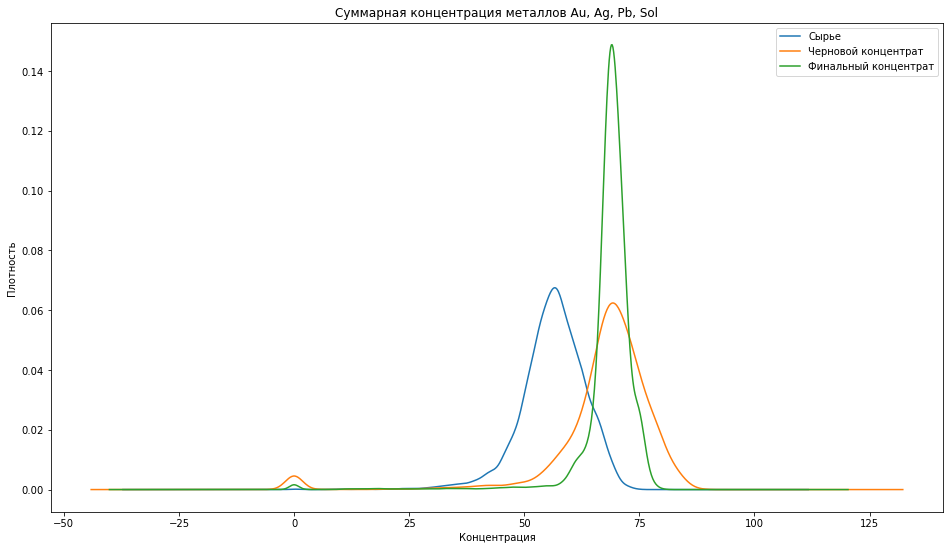

In [58]:
all_concentrate_plot(train)

Суммарная концентрация веществ в тестовой выборке

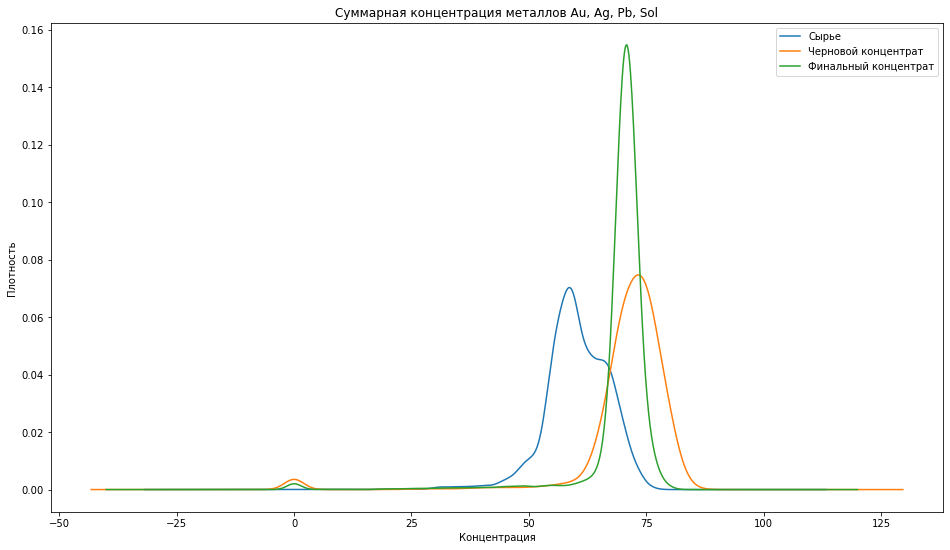

In [59]:
all_concentrate_plot(test)

Распределения в обучающей и тестовой выборках похожи.

Исходя из графика распределения для двух выборок можем сделать следующие выводы:
- Концентрация веществ увеличивается после флотации (т.е. среднее значение чернового концентрата смещается вправо по отношению к среднему сырья)
- Среднее значение концентрации веществ для чернового и финального концентратов примерно одинаковые
- В финальном концентрате, по сравнению с черновым, увеличивается число наблюдений с более высокой концентрацией веществ (т.е. значения приближаются к среднему)
- В выборке есть "выбивающиеся" значения близкие или равные нулю, они могут повлиять на обучение модели

#### Удаление аномальных значений 

В ходе анализа суммарной концентрации веществ мы наглядно увидели аномальные "0". Такие значения могут быть связаны со сбоями в технологическом процессе или в работе датчиков, которые  фиксирующих значения концентрации

Удалим пропущенные значения следующим способом:
1. В обучающей и тестовой выборках заменим нули на пропуски 
2. Избавимся от строк, где встречается хотя бы один пропуск в одном из трех нижеперечисленны столбцов: 
    - rougher.input.concentrate - суммарная концентрация веществ в сырье 
    - rougher.output.concentrate - суммарная концентрация веществ в черновом концентрате
    - final.output.concentrate - суммарная концентрация веществ в финальном концентрате
3. Для оставшихся строк вновь заполним пропуски в других признаках способом ffill, т.к. по условиям проекта соседние по времени параметры часто похожи

**Обучающая выборка**

Замена нулей на пропуски

In [60]:
train = train.replace(0, np.nan)

Удаление строк, где в одном из трех столбцов встречается пропуск

In [61]:
train = train.dropna(
    subset = ['rougher.input.concentrate', 'rougher.output.concentrate', 'final.output.concentrate'])

Заполнение оставшихся пропусков предыдущими значениями

In [62]:
train = train.ffill()

Смотрим, что получилось

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13795 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13795 non-null  float64
 1   final.output.concentrate_pb                         13795 non-null  float64
 2   final.output.concentrate_sol                        13795 non-null  float64
 3   final.output.concentrate_au                         13795 non-null  float64
 4   final.output.recovery                               13795 non-null  float64
 5   final.output.tail_ag                                13795 non-null  float64
 6   final.output.tail_pb                                13795 non-null  float64
 7   final.output.tail_sol                               13795 non-null  float64
 8   final.output.tail_au                     

Мы удалили 354 строки, доля таких записей к общему числу в обучающей выборке (14149) небольшая. Посмотрим на распределение

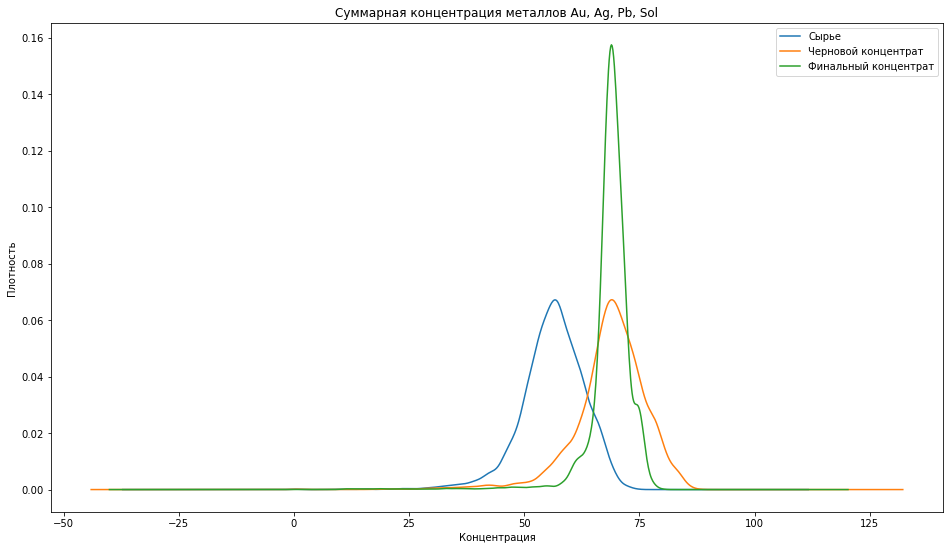

In [64]:
all_concentrate_plot(train)

Аномальных значений не наблюдается, распределение выглядит хорошо - среднее концентрации веществ в черновом концентрате увеличивается по сравнению с средним сырья до флотации. На финальном этапе мы видим , что увеличивается число записей которые стремятся к среднему значению. Это означает увеличение записей на финальном этапе с повышенной концентраций веществ 

Аналогичным способом удалим аномальные значения в тестовой выборке и посмотрим на данные

**Тестовая выборка**

Заменяем нули на пропуски

In [65]:
test = test.replace(0, np.nan)

Удаляем пропуски, встречающиеся в одном из трех столбцов

In [66]:
test = test.dropna(
    subset = ['rougher.input.concentrate', 'rougher.output.concentrate', 'final.output.concentrate'])

Заполняем оставщиеся пропуски предыдущими значениями

In [67]:
test = test.ffill()

Смотрим, что получилось

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5154 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.input.sulfate                       5154 non-null   float64
 1   primary_cleaner.input.depressant                    5154 non-null   float64
 2   primary_cleaner.input.feed_size                     5154 non-null   float64
 3   primary_cleaner.input.xanthate                      5154 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air              5154 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level            5154 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air              5154 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level            5154 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air    

Мы удалили 136 строк, доля таких записей к общему числу в тестовой выборке (5290) небольшая. Посмотрим на распределение

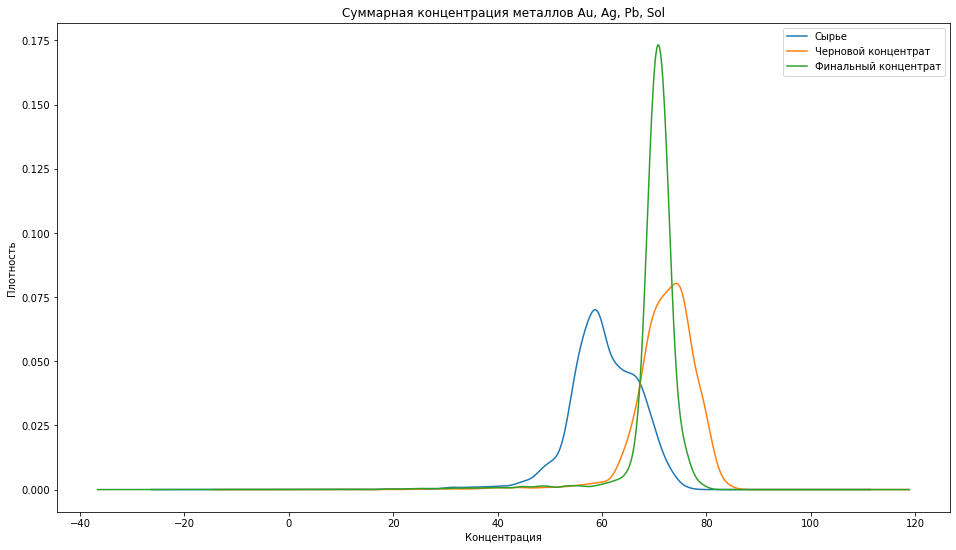

In [69]:
all_concentrate_plot(test)

Распределение выглядит похожим на обучающую выборку. Аномальных значений не наблюдается, среднее концентрации веществ в черновом концентрате увеличивается по сравнению с средним сырья до флотации. На финальном этапе увеличивается число записей которые стремятся к среднему значению. 

In [70]:
test['rougher.output.concentrate'].median()

72.79179087122515

In [71]:
test['final.output.concentrate'].median()

70.72665556165923

## Модель

### Функция для вычисления sMAPE

Cимметричное среднее абсолютное процентное отклонение sMAPE рассчитывается по формуле https://wikimedia.org/api/rest_v1/media/math/render/svg/9d7003eba8a7ffe2379cd5c232adf78daa3d1edf. Напишем функцию, она пригодится нам для выбора самой качественной модели

In [72]:
def smape(target, predict):
    """Расчет симметричного среднего абсолютного процентного отклонения sMAPE"""
    
    smape = 100/len(target) * np.sum((abs(predict - target)) / ((abs(predict) + abs(target))/2))

    return smape

Итоговое sMAPE рассчитывается по формуле sMAPE = 25% * sMape(rougher) + 75% * sMape(final). 

Напишем функцию, чтобы после выбора модели и гиперпараметров оценить качество модели по итоговому sMAPE

In [73]:
def final_smape(rougher, final):
    """Оценка качества модели по итоговому sMAPE"""
    final_smape = (rougher * 0.25) + (final * 0.75)
    return final_smape

*Прим. Делаем две функции:*

*smape - которая будет участвовать в подборе лучшей модели и гиперпараметров для чернового концентрата и для финального концентрата отдельно* 

*final_smape - которая сделает общую оценку по выбранным моделям с лучшими гиперпараметрами*

### Выбор модели

#### Подготовка данных для модели

На шаге 1.4. мы присоединили все недостающие признаки (фичи и таргеты) для тестовой выборки из исходных данных, чтобы провести анализ данных и получить целевые признаки в тестовую выборку. 

Для правильного обучения и проверки качества модели нам необходимо оставить те признаки (фичи), которые есть на начало процесса. Признаки на начало процесса - это то, что есть в исходных тестовых данных до предобработки. 

Поэтому создадим переменные для моделей следующим образом:

Обучающая выборка:

- features_train - признаки (фичи) из обучающей выборки, имеющиеся на начало процесса. Т.е. из обчающей выборки удалим фичи, которые отсутствовали в тестовой выборке (+ удаляем два таргета и столбцы с нашими расчетами на этапе анализа)


- target_train_rougher - целевой признак чернового концентрата, который есть в обучающей выборке


- target_train_final - целевой признак финального концентрата, который есть в обучающей выборке


Тестовая выборка:

- features_test - оставляем все признаки (фичи), которые были в исходной тестовой выборке до ее предообработки. Т.е. удаляем все фичи и таргеты, которые присоединяли из выборки с полными данными (full). Плюс удаляем наши расчеты из шага 2


- target_test_rougher - целевой признак для чернового концентрата, который подтянули из исходных данных (full)


- target_test_final - целевой признак для финального концентрата, который подтянули из исходных данных (full)


**Обучающая выборка**

Признаки

In [74]:
features_train = train.drop(['rougher_recovery', 'rougher.input.concentrate', # 4 столбца с расчетами
                                   'rougher.output.concentrate','final.output.concentrate', 
                                   'rougher.output.recovery','final.output.recovery', #2 таргета
                                   'final.output.concentrate_ag', 'final.output.concentrate_pb', #ниже все фичи,  
                                   'final.output.concentrate_sol', 'final.output.concentrate_au',#которых нет 
                                   'final.output.tail_ag', 'final.output.tail_pb',               #в тестовой выборке
                                   'final.output.tail_sol', 'final.output.tail_au',
                                   'primary_cleaner.output.concentrate_ag',
                                   'primary_cleaner.output.concentrate_pb',
                                   'primary_cleaner.output.concentrate_sol',
                                   'primary_cleaner.output.concentrate_au',
                                   'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
                                   'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',      
                                   'rougher.calculation.sulfate_to_au_concentrate',
                                   'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                   'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                   'rougher.calculation.au_pb_ratio', 
                                   'rougher.output.concentrate_ag',
                                   'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                                   'rougher.output.concentrate_au',
                                   'rougher.output.tail_ag', 'rougher.output.tail_pb',
                                   'rougher.output.tail_sol', 'rougher.output.tail_au',
                                   'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
                                   'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au'], 
                                  axis=1)

Целевой признак чернового концентрата

In [75]:
target_train_rougher = train['rougher.output.recovery']

Целевой признак финального концентрата

In [76]:
target_train_final = train['final.output.recovery']

**Тестовая выборка**

Признаки

In [77]:
features_test = test.drop(['rougher.input.concentrate', # 3 столбца с расчетами
                           'rougher.output.concentrate','final.output.concentrate', 
                           'rougher.output.recovery','final.output.recovery', # 2 таргета
                           'final.output.concentrate_ag', 'final.output.concentrate_pb', #все фичи, которые 
                           'final.output.concentrate_sol', 'final.output.concentrate_au',#присоединяли из full
                           'final.output.tail_ag', 'final.output.tail_pb',
                           'final.output.tail_sol', 'final.output.tail_au',
                           'primary_cleaner.output.concentrate_ag',
                           'primary_cleaner.output.concentrate_pb',
                           'primary_cleaner.output.concentrate_sol',
                           'primary_cleaner.output.concentrate_au',
                           'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
                           'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',      
                           'rougher.calculation.sulfate_to_au_concentrate',
                           'rougher.calculation.floatbank10_sulfate_to_au_feed',
                           'rougher.calculation.floatbank11_sulfate_to_au_feed',
                           'rougher.calculation.au_pb_ratio', 
                           'rougher.output.concentrate_ag',
                           'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                           'rougher.output.concentrate_au',
                           'rougher.output.tail_ag', 'rougher.output.tail_pb',
                           'rougher.output.tail_sol', 'rougher.output.tail_au',
                           'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
                           'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au'], 
                          axis=1)

Целевой признак чернового концентрата

In [78]:
target_test_rougher = test['rougher.output.recovery']

Целевой признак финального концентрата

In [79]:
target_test_final = test['final.output.recovery']

Проверим, что нет 0 в целевых признаках в двух выборках

In [80]:
target_train_rougher.min()

2.5208538028907777

In [81]:
target_train_final.min()

0.1686109414550471

In [82]:
target_test_rougher.min()

10.430586883535824

In [83]:
target_test_final.min()

2.0309166797817286

**Масштабирование количественных признаков**

Наши данные полностью состоят из числовых признаков, стандартизируем их с помощью StandardScaler.

In [84]:
scaler = StandardScaler()

In [85]:
scaler.fit(features_train) 

StandardScaler()

Преобразовываем числовые признаки в обучающей и тестовой выборках с помощью transform() и перезаписываем данные в  features_train и features_valid .

In [86]:
features_train = pd.DataFrame(scaler.transform(features_train), columns = features_train.columns,
                              index = features_train.index)

In [87]:
features_train.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.167946,0.378891,-0.119465,0.280525,-0.447762,-0.287875,-0.430472,-0.810633,-0.435251,-0.260750,...,-1.056118,-0.473230,-0.649749,-0.754028,-1.184765,-0.379743,-0.870199,-0.428883,-0.961635,-2.670289
2016-01-15 01:00:00,-0.205154,0.428714,-0.119465,0.317483,-0.243316,-0.343244,-0.244498,-0.322201,-0.241536,-0.278895,...,-1.060433,-0.532711,-0.678109,-0.696222,-1.165269,-0.428484,-0.886619,-0.431739,-0.988347,-2.507041
2016-01-15 02:00:00,-0.251178,0.731295,-0.119465,0.287187,-0.046628,-0.318039,-0.059133,-0.344112,-0.048642,-0.322404,...,-1.056438,-0.473879,-0.685275,-0.692838,-1.159835,-0.427413,-0.881581,-0.430080,-0.983055,-2.551263


In [88]:
features_test = pd.DataFrame(scaler.transform(features_test), columns = features_test.columns,
                              index = features_test.index)

In [89]:
features_test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,1.961281,1.821994,1.227753,0.323751,-1.615943,-0.324368,-1.585693,-0.323791,-1.545997,-0.317768,...,-1.406453,-0.380669,-1.424859,-0.695498,-1.524368,1.349791,-1.425066,-0.417749,1.230368,0.191218
2016-09-01 01:59:59,2.078072,1.820319,1.227753,0.285071,-1.617518,-0.319696,-1.593958,-0.319610,-1.575306,-0.276799,...,-1.400374,-0.398422,-1.403158,-0.667232,-1.522359,-1.101237,-1.423970,-0.420957,0.936004,0.188252
2016-09-01 02:59:59,2.074702,1.196621,0.751628,0.299886,-1.619720,-0.342227,-1.587851,-0.319207,-1.561032,-0.358259,...,-1.417207,-0.399837,-1.409628,-0.687612,-1.503005,-0.445039,-1.419424,-0.412383,0.931626,0.166598


#### Модель для признака чернового концентрата

Качество лучшей модели будем оченивать по метрике sMAPE. Поэтому для подбора гиперпараметров с помощью GridSearchCV для аргумента scoring передадим нашу функцию smape. Т.к. мы ищем минальное значение, то добавляем greater_is_better=True

In [90]:
my_scorer = make_scorer(smape, greater_is_better=True)

In [91]:
def best_param(model, parameters, features, target):
    """Подбор параметров модели с метрикой sMAPE"""
    grid = GridSearchCV(model, parameters, cv = 5, scoring = my_scorer)
    grid.fit(features, target)

    print("Параметры:", grid.best_params_)
    print("Score:", grid.best_score_)

Подбор гиперпараметров для линейной регрессии

In [92]:
model1 = LinearRegression()
parameters1 = {'fit_intercept':[True,False], 'copy_X':[True, False]}

In [93]:
best_param(model1, parameters1, features_train, target_train_rougher)

Параметры: {'copy_X': True, 'fit_intercept': False}
Score: 193.91585733793727


Побор гиперпараметров для дерева решений

In [94]:
model2 = DecisionTreeRegressor(random_state=42)
parameters2 = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40]}

In [95]:
best_param(model2, parameters2, features_train, target_train_rougher)

Параметры: {'max_depth': 40}
Score: 10.671002053838336


Подбор гиперпараметров для случайного леса

*Прим. Изначально перебиралось больше деревьев, было 'n_estimators': [10, 20, 50, 100]. Но так как GridSearchСV медленно работает и в итоге предлагает 10 деревьев, то оставлено до 50 деревьев. Чтобы чуть быстрее все ячейки запускались*

In [96]:
model3 = RandomForestRegressor(random_state=42)
parameters3 = {'n_estimators': [10, 20, 50]}

In [97]:
best_param(model3, parameters3, features_train, target_train_rougher)

Параметры: {'n_estimators': 10}
Score: 7.546085678428797


Модель с лучшей метрикой sMape для чернового концентрата - случайный лес с 10 деревьями

#### Модель для признака финального концентрата

Линейная регрессия

In [98]:
best_param(model1, parameters1, features_train, target_train_final)

Параметры: {'copy_X': True, 'fit_intercept': False}
Score: 193.81996486847646


Дерево решений

In [99]:
best_param(model2, parameters2, features_train, target_train_final)

Параметры: {'max_depth': 40}
Score: 17.01580479877378


Случайный лес

In [100]:
best_param(model3, parameters3, features_train, target_train_final)

Параметры: {'n_estimators': 10}
Score: 10.334039565005924


Модель с лучшей метрикой sMape для финального концентрата - случайный лес с 10 деревьями. Точно такую же лучшую модель мы получили для чернового концентрата. 

### Проверка модели на тестовой выборке

Проверим нашу лучшую модель на тестовой выборке

In [101]:
best_model = RandomForestRegressor(random_state=42, n_estimators = 10)

#### Кросс-валидация на тестовой выборке

In [102]:
rougher_cv = cross_val_score(
    best_model, features_test, target_test_rougher, cv=5, scoring = my_scorer).mean()
rougher_cv

4.465194938008582

Проверка для финального концентрата. Получаем среднюю оценку sMAPE из пяти оценок

In [103]:
final_cv = cross_val_score(
    best_model, features_test, target_test_final, cv=5, scoring = my_scorer).mean()
final_cv

9.057167639383636

Посмотрим на итоговое sMAPE исходя из средних значений sMAPE для моделей, предсказывающих черновой и финальный концентрат 

In [104]:
final_smape(rougher_cv, final_cv)

7.9091744640398725

#### Тестирование модели на всей тестовой выборке

Теперь сделаем предсказания модели на всей тестовой выборке

Предсказания для чернового концентрата

In [105]:
best_model.fit(features_train, target_train_rougher)

RandomForestRegressor(n_estimators=10, random_state=42)

In [106]:
predict_test_rougher = best_model.predict(features_test)

Получаем sMAPE модели

In [107]:
rougher = smape(target_test_rougher, predict_test_rougher)
rougher

4.431134081032991

Предсказания для финального концентрата

In [108]:
best_model.fit(features_train, target_train_final)

RandomForestRegressor(n_estimators=10, random_state=42)

In [109]:
predict_test_final = best_model.predict(features_test)

Получем sMAPE модели

In [110]:
final = smape(target_test_final, predict_test_final)
final

8.737095701091334

Посчитаем итоговое sMAPE: (0.25 * sMAPE модели для чернового концентрата) + (0.75 * sMAPE модели для финального концентрата). Наша функция final_smape делает расчет по этой формуле

In [111]:
final_smape(rougher, final)

7.660605296076748

**Общий вывод:**
мы подобрали лучшую модель для предсказания коэффициента восстановления золота из золотосодержащей руды - это модель случайного леса с 10 деревьями. Данная модель показывает лучшее sMAPE как для чернового концентрата, так и для финального. Метрика итогового sMAPE равна 7.7 - можем считать это хорошим показателем. 
Для сравнения, на обучающей выборке среднее значение концентрации золота на финальном этапе - 44, а медиана - 45. 